# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from IPython.display import SVG
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy (1).h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


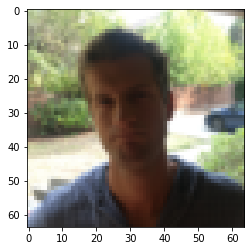

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [7]:
history_model = model.fit(X_train, Y_train, 
                    epochs=15, batch_size=15,
                    validation_data=(X_test, Y_test))

Epoch 1/15
40/40 [==============================] - 6s 129ms/step - loss: 0.6862 - accuracy: 0.5450 - val_loss: 0.6654 - val_accuracy: 0.6467
Epoch 2/15
40/40 [==============================] - 5s 124ms/step - loss: 0.5536 - accuracy: 0.7467 - val_loss: 0.4258 - val_accuracy: 0.8400
Epoch 3/15
40/40 [==============================] - 5s 124ms/step - loss: 0.3240 - accuracy: 0.8550 - val_loss: 0.3162 - val_accuracy: 0.8533
Epoch 4/15
40/40 [==============================] - 5s 125ms/step - loss: 0.2136 - accuracy: 0.9183 - val_loss: 0.1876 - val_accuracy: 0.9400
Epoch 5/15
40/40 [==============================] - 5s 129ms/step - loss: 0.1771 - accuracy: 0.9267 - val_loss: 0.2210 - val_accuracy: 0.9267
Epoch 6/15
40/40 [==============================] - 6s 141ms/step - loss: 0.1447 - accuracy: 0.9467 - val_loss: 0.1511 - val_accuracy: 0.9467
Epoch 7/15
40/40 [==============================] - 6s 146ms/step - loss: 0.1019 - accuracy: 0.9650 - val_loss: 0.1562 - val_accuracy: 0.9200
Epoch 

# Evaluate / Test

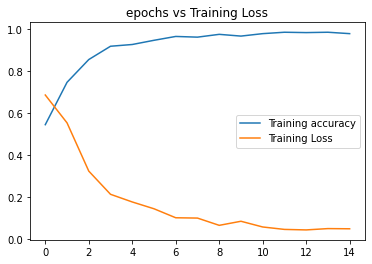

In [8]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [9]:
evaluation = model.evaluate(X_test, Y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 59ms/step - loss: 0.2051 - accuracy: 0.9333

Test Accuracy = 0.9333333373069763
Loss = 0.20512224733829498


Confusion Matrix

In [10]:
Y_true = np.argmax(Y_test,axis = 1)
Y_pred = model.predict(X_test)

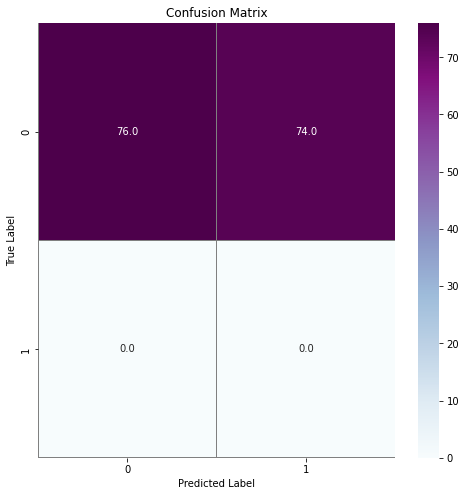

In [11]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, tf.math.round(Y_pred, 0))
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, tf.math.round(Y_pred, 0))
# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


In [12]:
#with adam optimizer we have accuracy= 0.96
#with RMSprop optimizer we have accuracy=0.80
#Conclusion: Adam optimizer is efficient than RMSprop optimizer

Image shape : (64, 64, 3)
Actual  [1]
Predicted  [[1.]]


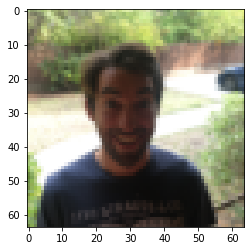

In [14]:
print("Image shape :",X_train_orig[525].shape)
#imshow(X_test_orig[525])
print("Actual ",Y_test[99])

img = X_test_orig[99]
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print("Predicted ",model.predict(x))